<a href="https://colab.research.google.com/github/pgautam8601/Accelerated_Computer_Science_Fundamentals_Specialization/blob/master/Content_Based_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EDA  (Exploratory Data Analysis)

In [ ]:
import pandas as pd
import gdown
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [ ]:
pip install plotly_express==0.4.0

In [ ]:
import plotly_express  as px

In [ ]:
books = pd.read_csv("books.csv")

tags_data = pd.read_csv("book_tags.csv")

book_tags = pd.read_csv("tags.csv")

ratings_data=pd.read_csv('ratings.csv')

In [ ]:
ratings_data = ratings_data.sort_values("user_id")
ratings_data.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True) 

In [ ]:
books= books.drop(columns=['book_id', 'best_book_id', 'work_id', 'isbn', 'isbn13', 'title','work_ratings_count',
                                   'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 
                                    'image_url','small_image_url'])

In [ ]:
books = books.dropna()
books.drop_duplicates(subset='original_title',keep=False,inplace=True)

In [ ]:
top_rated = books.sort_values('average_rating', ascending=False)
tf_top_rated = top_rated[:15]
fig = px.bar(tf_top_rated, x="average_rating", y="original_title", title='Top Rated Books and Their Ratings',
             orientation='h', color='original_title', width=1500, height=700)
fig.show()

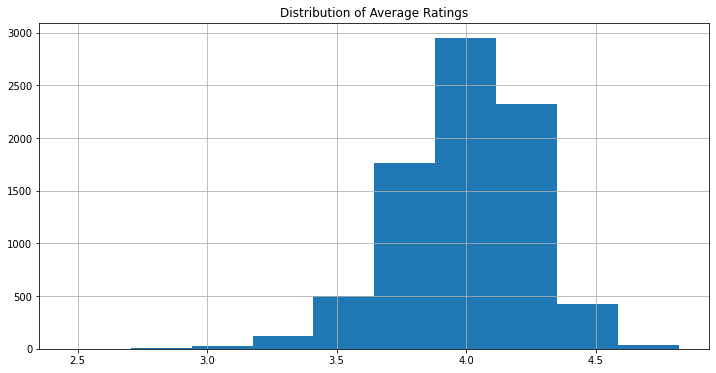

In [ ]:
#distribution of average ratings of all the 10000 books
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Distribution of Average Ratings")
books["average_rating"].hist()
display()

In [ ]:
books2 = pd.read_csv('books.csv')
books2 = books2.dropna()

In [ ]:
books_filter = pd.DataFrame(books2, columns=['book_id', 'authors', 'original_title', 'average_rating'])

books_filter = books_filter.sort_values('average_rating', ascending=False)

books_filter.head(15)

,book_id,authors,original_title,average_rating
3627,24812,Bill Watterson,The Complete Calvin and Hobbes,4.82
861,17332218,Brandon Sanderson,Words of Radiance,4.77
8853,95602,Francine Rivers,Mark of the Lion Trilogy,4.76
4482,24814,Bill Watterson,It's a Magical World: A Calvin and Hobbes Coll...,4.75
6360,70489,Bill Watterson,There's Treasure Everywhere: A Calvin and Hobb...,4.74
421,862041,J.K. Rowling,Complete Harry Potter Boxed Set,4.74
6589,59715,Bill Watterson,The Authoritative Calvin and Hobbes,4.73
6919,24815,Bill Watterson,The Indispensable Calvin and Hobbes: A Calvin ...,4.73
3752,10,J.K. Rowling,"Harry Potter Collection (Harry Potter, #1-6)",4.73
9565,70487,Bill Watterson,Attack of the Deranged Mutant Killer Monster S...,4.72


In [ ]:
top_author_counts = books['authors'].value_counts().reset_index()
top_author_counts.columns = ['value', 'count']
top_author_counts['value'] = top_author_counts['value']
top_author_counts = top_author_counts.sort_values('count')
fig = px.bar(top_author_counts.tail(10), x="count", y="value", title='Top Authors', orientation='h', color='value',
             width=1000, height=700)
fig.show()

In [ ]:
ratings_data.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True) 
books.drop_duplicates(subset='original_title',keep=False,inplace=True)

In [ ]:
books2= books2.drop(columns=[ 'best_book_id', 'work_id', 'isbn13', 'title','work_ratings_count',
                                   'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 
                                    'image_url','small_image_url'])

In [ ]:
merge_data2 = pd.merge(books2, ratings_data, on='book_id')
merge_data2 =  merge_data2.sort_values('book_id', ascending=True)
merge_data2.head()

,id,book_id,books_count,isbn,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,user_id,rating
1398,27,1,275,439785960,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,314,5
1471,27,1,275,439785960,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,37284,5
1470,27,1,275,439785960,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,33890,3
1469,27,1,275,439785960,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,33872,5
1468,27,1,275,439785960,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54,1678823,33716,5


In [ ]:
years= books2['original_publication_year'].value_counts().reset_index()
years.columns = ['year', 'count']
years['year'] = years['year']
years = years.sort_values('count')
fig = px.bar(years.tail(50), x="count", y="year", title='Publication Year', orientation='h', color='count',
             width=1000, height=700)
fig.show()

In [ ]:
lang= books2['language_code'].value_counts().reset_index()
lang.columns = ['value', 'count']
lang['value'] = lang['value']
lang = lang.sort_values('count')
fig = px.bar(lang.tail(10), x="count", y="value", title='Languages', orientation='h', color='count',
             width=1000, height=700)
fig.show()

In [ ]:
# Mean rating per user

MRPU = ratings_data.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['book_id','rating'],axis=1, inplace=True)
MRPU.head(15)

,user_id,mean_rating
0,1,3.666667
1,2,4.333333
2,3,1.000000
3,4,4.000000
4,5,4.200000
5,6,4.500000
6,7,3.797297
7,8,3.666667
8,9,3.142857
9,10,3.750000


In [ ]:
rating_data = pd.merge(ratings_data, MRPU, on=['user_id', 'user_id'])
rating_data.head(200)

,book_id,user_id,rating,mean_rating
0,1180,1,4,3.666667
1,4893,1,3,3.666667
2,6285,1,4,3.666667
3,8034,2,4,4.333333
4,8855,2,5,4.333333
...,...,...,...,...
195,9575,22,3,3.578947
196,7568,22,3,3.578947
197,9526,22,3,3.578947
198,4731,22,4,3.578947


In [ ]:
ratings_data[ratings_data['user_id']== 11141  ].head(10)

,book_id,user_id,rating
971387,9887,11141,5
873192,8836,11141,2
946639,9621,11141,5
859507,8693,11141,3


In [ ]:
ratings_data['user_id'].unique()[-1]   # Total number of users

53424

In [ ]:
book_tags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [ ]:
#Data Preprocessing

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib.style as style
import os

In [ ]:
books = pd.read_csv("books.csv")
book_tags = pd.read_csv("book_tags.csv")
tags = pd.read_csv("tags.csv")
ratings = pd.read_csv("ratings.csv")

In [ ]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [ ]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [ ]:
#Joining book_tags and tags dataframe by Left join.

In [ ]:
book_tags = pd.merge(book_tags,tags,on='tag_id',how='left')


In [ ]:
book_tags.drop(book_tags[book_tags.duplicated()].index, inplace = True)

In [ ]:
book_tags

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,1,11305,37174,fantasy
2,1,11557,34173,favorites
3,1,8717,12986,currently-reading
4,1,33114,12716,young-adult
...,...,...,...,...
999907,33288638,21303,7,neighbors
999908,33288638,17271,7,kindleunlimited
999909,33288638,1126,7,5-star-reads
999910,33288638,11478,7,fave-author


In [ ]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
#Removing unnecessary Columns
books.drop(columns=['id', 'best_book_id', 'work_id', 'isbn', 'isbn13', 'title','work_ratings_count','ratings_count','work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3','ratings_4', 'ratings_5', 'image_url','small_image_url'], inplace= True)

#Renaming Columns
books.rename(columns={'original_publication_year':'pub_year', 'original_title':'title', 'language_code':'language', 'average_rating':'rating'}, inplace=True)

In [ ]:
books.isnull().sum()

book_id           0
books_count       0
authors           0
pub_year         21
title           585
language       1084
rating            0
dtype: int64

In [ ]:
#Dropping the Null values
books.dropna(inplace= True)

In [ ]:
#Using Split-String function for creating a list of authors
books['authors'] = books.authors.str.split(',')

In [ ]:
books

,book_id,books_count,authors,pub_year,title,language,rating
0,2767052,272,[Suzanne Collins],2008.0,The Hunger Games,eng,4.34
1,3,491,"[J.K. Rowling, Mary GrandPré]",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44
2,41865,226,[Stephenie Meyer],2005.0,Twilight,en-US,3.57
3,2657,487,[Harper Lee],1960.0,To Kill a Mockingbird,eng,4.25
4,4671,1356,[F. Scott Fitzgerald],1925.0,The Great Gatsby,eng,3.89
...,...,...,...,...,...,...,...
9994,15613,199,[Herman Melville],1924.0,"Billy Budd, Sailor",eng,3.09
9995,7130616,19,[Ilona Andrews],2010.0,Bayou Moon,eng,4.09
9996,208324,19,[Robert A. Caro],1990.0,Means of Ascent,eng,4.25
9997,77431,60,[Patrick O'Brian],1977.0,The Mauritius Command,eng,4.35


In [ ]:
book_authors = books.copy()

#For every row in the dataframe, iterating through the list of authors and placing 1 in the corresponding column
for index, row in books.iterrows():
    for author in row['authors']:
        book_authors.at[index, author] = 1
        
#Filling in the NaN values with 0 to show that a book isn't written by that author
book_authors = book_authors.fillna(0)
book_authors.head()

,book_id,books_count,authors,pub_year,title,language,rating,Suzanne Collins,J.K. Rowling,Mary GrandPré,Stephenie Meyer,Harper Lee,F. Scott Fitzgerald,John Green,J.R.R. Tolkien,J.D. Salinger,Dan Brown,Jane Austen,Khaled Hosseini,Veronica Roth,George Orwell,Erich Fromm,Celâl Üster,Anne Frank,Eleanor Roosevelt,B.M. Mooyaart-Doubleday,Stieg Larsson,Reg Keeland,Rufus Beck,Alice Sebold,William Golding,William Shakespeare,Robert Jackson,Gillian Flynn,Kathryn Stockett,John Steinbeck,Arthur Golden,E.L. James,Paulo Coelho,Alan R. Clarke,...,Gary Zukav,Lauren Morrill,Charlie Lovett,Aleksandr Griboyedov,Александр Сергеевич Грибоедов,Howard Dully,Charles Fleming,Karen Harper,José Emilio Pacheco,Emery Lord,Ilsa Madden-Mills,Angela Duckworth,Dan Abnett,Max Frisch,Alex Gino,Tillie Cole,Jana Deleon,Lawrence Ferlinghetti,Nicci French,Tedd Arnold,Abigail Haas,Abby McDonald,Adam M. Grant,Maria Dahvana Headley,Inga Muscio,Betty Dodson,Giulia Enders,Jill Enders,Yukio Mishima,John Nathan,Deeanne Gist,Peter Matthiessen,Tom Clancy,Steve Pieczenik,John Rawls,Oscar Hijuelos,Ben Okri,Miles Cameron,Ian Mortimer,Peggy Orenstein
0,2767052,272,[Suzanne Collins],2008.0,The Hunger Games,eng,4.34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,491,"[J.K. Rowling, Mary GrandPré]",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41865,226,[Stephenie Meyer],2005.0,Twilight,en-US,3.57,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2657,487,[Harper Lee],1960.0,To Kill a Mockingbird,eng,4.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4671,1356,[F. Scott Fitzgerald],1925.0,The Great Gatsby,eng,3.89,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Generalising the format of author names for simplicity 
book_authors.columns = [c.lower().strip().replace(' ', '_') for c in book_authors.columns]

#Setting book_id as index of the dataframe 
book_authors = book_authors.set_index(book_authors['book_id'])

#Dropping unnecessary columns
book_authors.drop(columns= {'book_id','pub_year','title','rating','books_count', 'authors','language'}, inplace=True)

In [ ]:
#FINAL book_authors:-

In [ ]:
book_authors.head()

,suzanne_collins,j.k._rowling,mary_grandpré,stephenie_meyer,harper_lee,f._scott_fitzgerald,john_green,j.r.r._tolkien,j.d._salinger,dan_brown,jane_austen,khaled_hosseini,veronica_roth,george_orwell,erich_fromm,celâl_üster,anne_frank,eleanor_roosevelt,b.m._mooyaart-doubleday,stieg_larsson,reg_keeland,rufus_beck,alice_sebold,william_golding,william_shakespeare,robert___________jackson,gillian_flynn,kathryn_stockett,john_steinbeck,arthur_golden,e.l._james,paulo_coelho,alan_r._clarke,lois_lowry,c.s._lewis,audrey_niffenegger,george_r.r._martin,elizabeth_gilbert,rick_riordan,louisa_may_alcott,...,gary_zukav,lauren_morrill,charlie_lovett,aleksandr_griboyedov,александр_сергеевич_грибоедов,howard_dully,charles_fleming,karen_harper,josé_emilio_pacheco,emery_lord,ilsa_madden-mills,angela_duckworth,dan_abnett,max_frisch,alex_gino,tillie_cole,jana_deleon,lawrence_ferlinghetti,nicci_french,tedd_arnold,abigail_haas,abby_mcdonald,adam_m._grant,maria_dahvana_headley,inga_muscio,betty_dodson,giulia_enders,jill_enders,yukio_mishima,john_nathan,deeanne_gist,peter_matthiessen,tom_clancy,steve_pieczenik,john_rawls,oscar_hijuelos,ben_okri,miles__cameron,ian_mortimer,peggy_orenstein
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2767052,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41865,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2657,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4671,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Content-based Recommendation System

In [ ]:
#Creating an input user to recommend books to:-
user_1 = pd.DataFrame([{'book_id':2767052, 'rating':5.0},{'book_id':3, 'rating':4.0}, {'book_id':41865, 'rating':4.5},{'book_id':15613, 'rating':3.0},{'book_id':2657, 'rating':2.5}])
user_1

,book_id,rating
0,2767052,5.0
1,3,4.0
2,41865,4.5
3,15613,3.0
4,2657,2.5


In [ ]:
user_authors = book_authors[book_authors.index.isin(user_1['book_id'].tolist())].reset_index(drop=True)
user_authors

,suzanne_collins,j.k._rowling,mary_grandpré,stephenie_meyer,harper_lee,f._scott_fitzgerald,john_green,j.r.r._tolkien,j.d._salinger,dan_brown,jane_austen,khaled_hosseini,veronica_roth,george_orwell,erich_fromm,celâl_üster,anne_frank,eleanor_roosevelt,b.m._mooyaart-doubleday,stieg_larsson,reg_keeland,rufus_beck,alice_sebold,william_golding,william_shakespeare,robert___________jackson,gillian_flynn,kathryn_stockett,john_steinbeck,arthur_golden,e.l._james,paulo_coelho,alan_r._clarke,lois_lowry,c.s._lewis,audrey_niffenegger,george_r.r._martin,elizabeth_gilbert,rick_riordan,louisa_may_alcott,...,gary_zukav,lauren_morrill,charlie_lovett,aleksandr_griboyedov,александр_сергеевич_грибоедов,howard_dully,charles_fleming,karen_harper,josé_emilio_pacheco,emery_lord,ilsa_madden-mills,angela_duckworth,dan_abnett,max_frisch,alex_gino,tillie_cole,jana_deleon,lawrence_ferlinghetti,nicci_french,tedd_arnold,abigail_haas,abby_mcdonald,adam_m._grant,maria_dahvana_headley,inga_muscio,betty_dodson,giulia_enders,jill_enders,yukio_mishima,john_nathan,deeanne_gist,peter_matthiessen,tom_clancy,steve_pieczenik,john_rawls,oscar_hijuelos,ben_okri,miles__cameron,ian_mortimer,peggy_orenstein
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_1.rating

0    5.0
1    4.0
2    4.5
3    3.0
4    2.5
Name: rating, dtype: float64

In [ ]:
#Dot Product to get Weights
userProfile = user_authors.transpose().dot(user_1['rating'])
#The User Profile
userProfile

suzanne_collins    5.0
j.k._rowling       4.0
mary_grandpré      4.0
stephenie_meyer    4.5
harper_lee         3.0
                  ... 
oscar_hijuelos     0.0
ben_okri           0.0
miles__cameron     0.0
ian_mortimer       0.0
peggy_orenstein    0.0
Length: 5271, dtype: float64

In [ ]:
recommendation = (((book_authors*userProfile).sum(axis=1))/(userProfile.sum())).sort_values(ascending=False)
#Top 20 recommendations
recommendation.head(20)

book_id
99298      0.347826
6          0.347826
136251     0.347826
2          0.347826
1          0.347826
5          0.347826
15881      0.347826
3          0.347826
262430     0.217391
319644     0.217391
385742     0.217391
7260188    0.217391
385706     0.217391
6148028    0.217391
2767052    0.217391
7938275    0.217391
428263     0.195652
3609763    0.195652
1162543    0.195652
1656001    0.195652
dtype: float64

In [ ]:
#The final recommendation table:

In [ ]:
books.loc[books['book_id'].isin(recommendation.head(20).keys())].reset_index()

,index,book_id,books_count,authors,pub_year,title,language,rating
0,0,2767052,272,[Suzanne Collins],2008.0,The Hunger Games,eng,4.34
1,1,3,491,"[J.K. Rowling, Mary GrandPré]",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44
2,16,6148028,201,[Suzanne Collins],2009.0,Catching Fire,eng,4.30
3,17,5,376,"[J.K. Rowling, Mary GrandPré, Rufus Beck]",1999.0,Harry Potter and the Prisoner of Azkaban,eng,4.53
4,19,7260188,239,[Suzanne Collins],2010.0,Mockingjay,eng,4.03
5,20,2,307,"[J.K. Rowling, Mary GrandPré]",2003.0,Harry Potter and the Order of the Phoenix,eng,4.46
6,22,15881,398,"[J.K. Rowling, Mary GrandPré]",1998.0,Harry Potter and the Chamber of Secrets,eng,4.37
7,23,6,332,"[J.K. Rowling, Mary GrandPré]",2000.0,Harry Potter and the Goblet of Fire,eng,4.53
8,24,136251,263,"[J.K. Rowling, Mary GrandPré]",2007.0,Harry Potter and the Deathly Hallows,eng,4.61
9,26,1,275,"[J.K. Rowling, Mary GrandPré]",2005.0,Harry Potter and the Half-Blood Prince,eng,4.54
